In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')   
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)
df_train=pd.read_csv("../artifacts/raw/train.csv")

In [6]:
df_train.drop(columns=['Booking_ID'], inplace=True)

In [7]:
df_train.duplicated().sum()

np.int64(7661)

In [8]:
df_train.drop_duplicates(inplace=True)

In [9]:
df_train_copy = df_train.copy()

In [ ]:
def num_plot_dist(df,num_features):
    fig,axes =plt.subplots(len(num_features),2,figsize=(15,5*len(num_features)))
    if len(num_features)==1:
        axes=[axes]
    for i,column  in enumerate(num_features):
        sns.histplot(df[column],ax=axes[i][0],kde=True)
        axes[i][0].set_title(f'Histogram of {column}')
        sns.boxplot(x=df[column],ax=axes[i][1])
        axes[i][1].set_title(f'Boxplot of {column}') 

In [12]:
df_train.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                           str
required_car_parking_space                int64
room_type_reserved                          str
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                         str
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                              str
dtype: object

In [22]:
numerical_cols=[col for col in df_train.columns if df_train[col].dtype in ['int64','float64'] ]
cat_cols=[col for col in df_train.columns if df_train[col].dtype in ['str'] ]

In [ ]:
%md
####Data Analysis

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [161]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

#DATA ANALYSIS

############################UNIVARIATE ANALYSYS

In [ ]:
df_train_copy=df_train.copy()

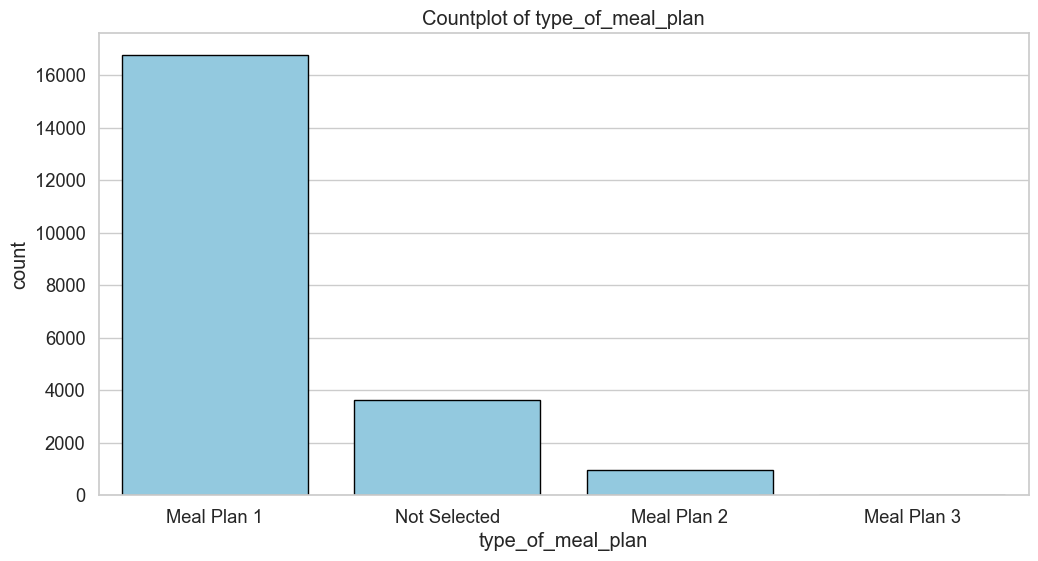

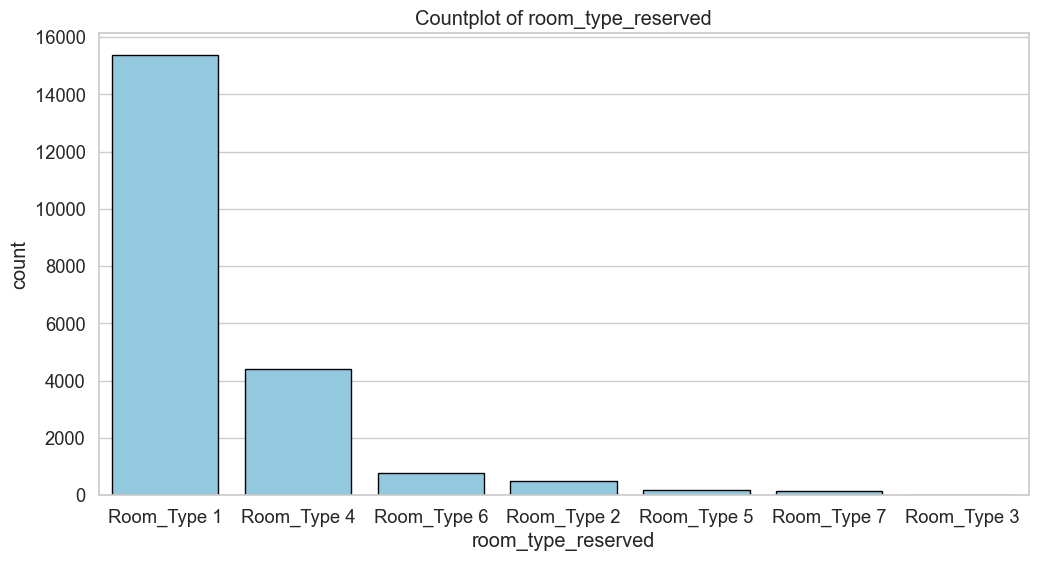

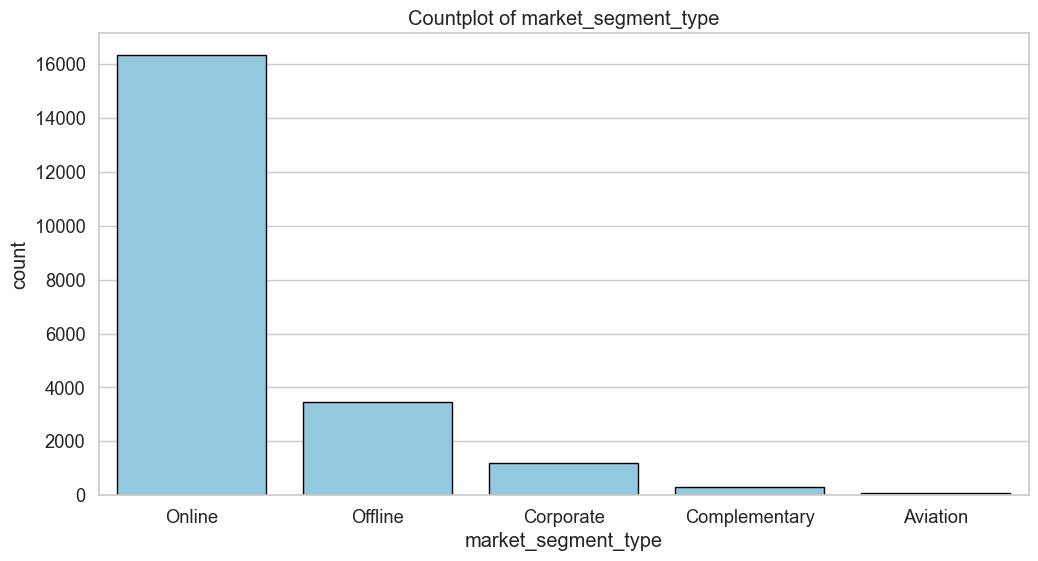

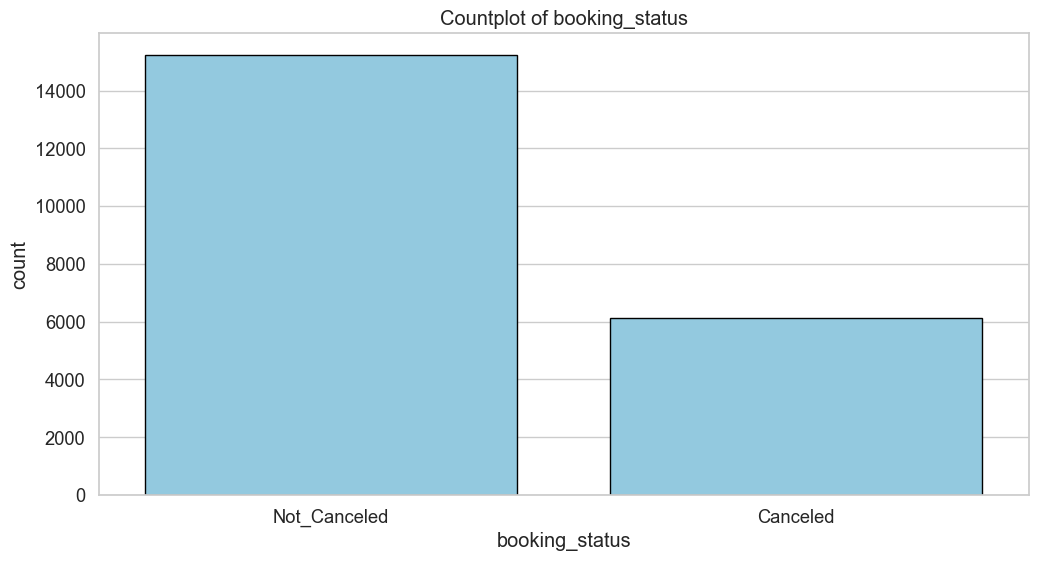

In [46]:
for cat_col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=df_train[cat_col], order = df_train[cat_col].value_counts().index,color="skyblue",edgecolor="black",)
    plt.title(f'Countplot of {cat_col}')
    plt.show()

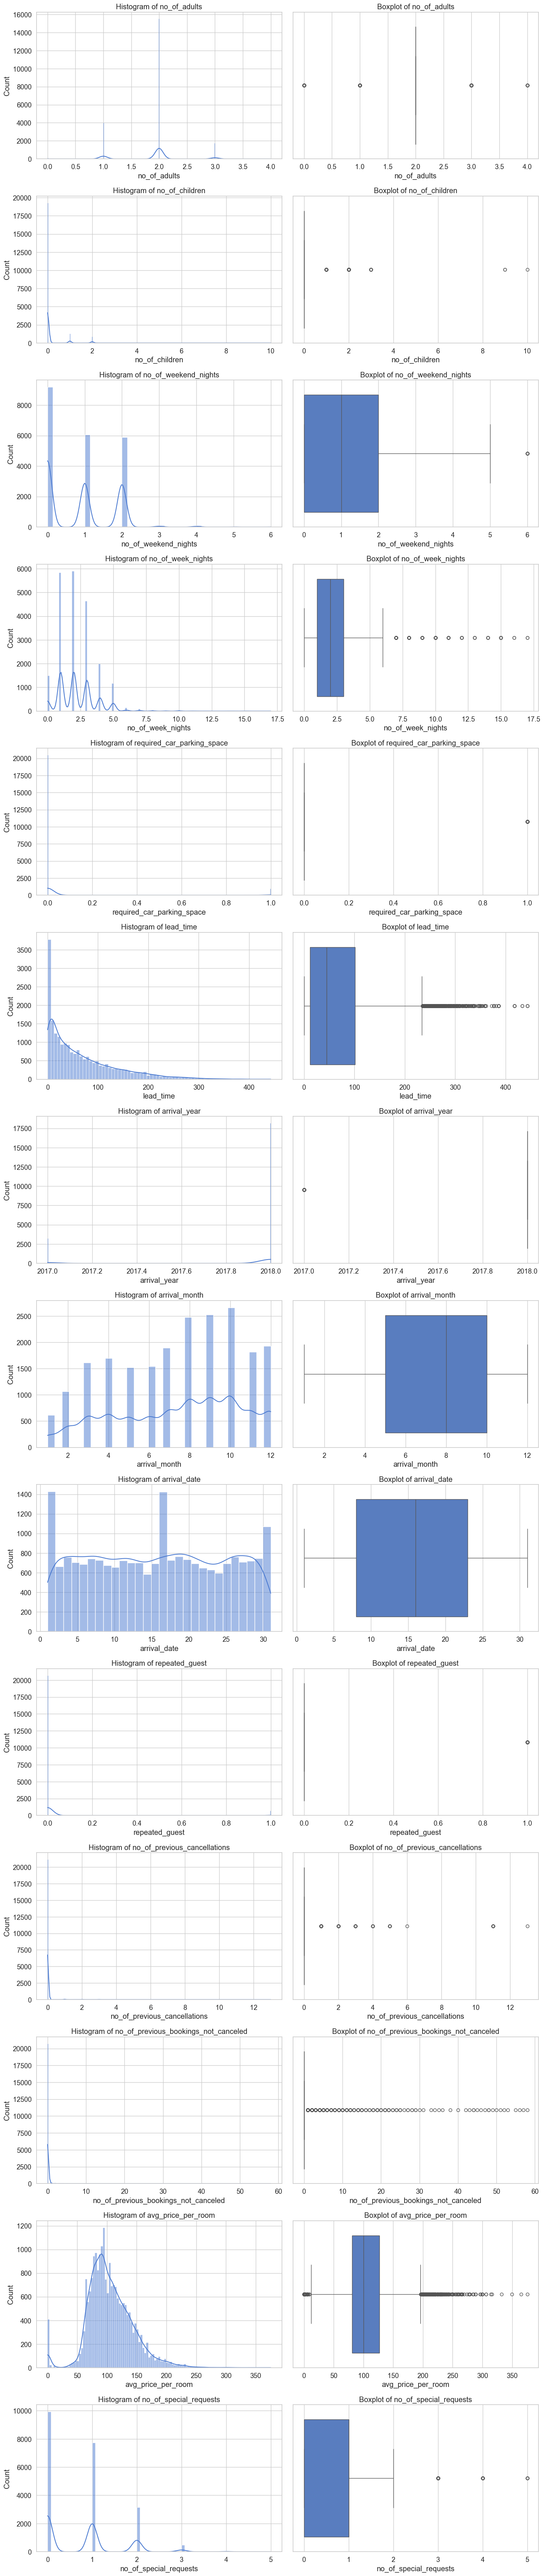

In [47]:
def num_plot_distribution(df,num_features):
    fig,axes =plt.subplots(len(num_features),2,figsize=(15,5*len(num_features)))
    if len(num_features)==1:
        axes=[axes]
    for i,column  in enumerate(num_features):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True, palette='Blues')
        axes[i][0].set_title(f'Histogram of {column}')
        sns.boxplot(data=df,x=column,ax=axes[i][1])
        axes[i][1].set_title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()
num_plot_distribution(df_train_copy,numerical_cols)       


In [48]:
#### Bivariate Analysis


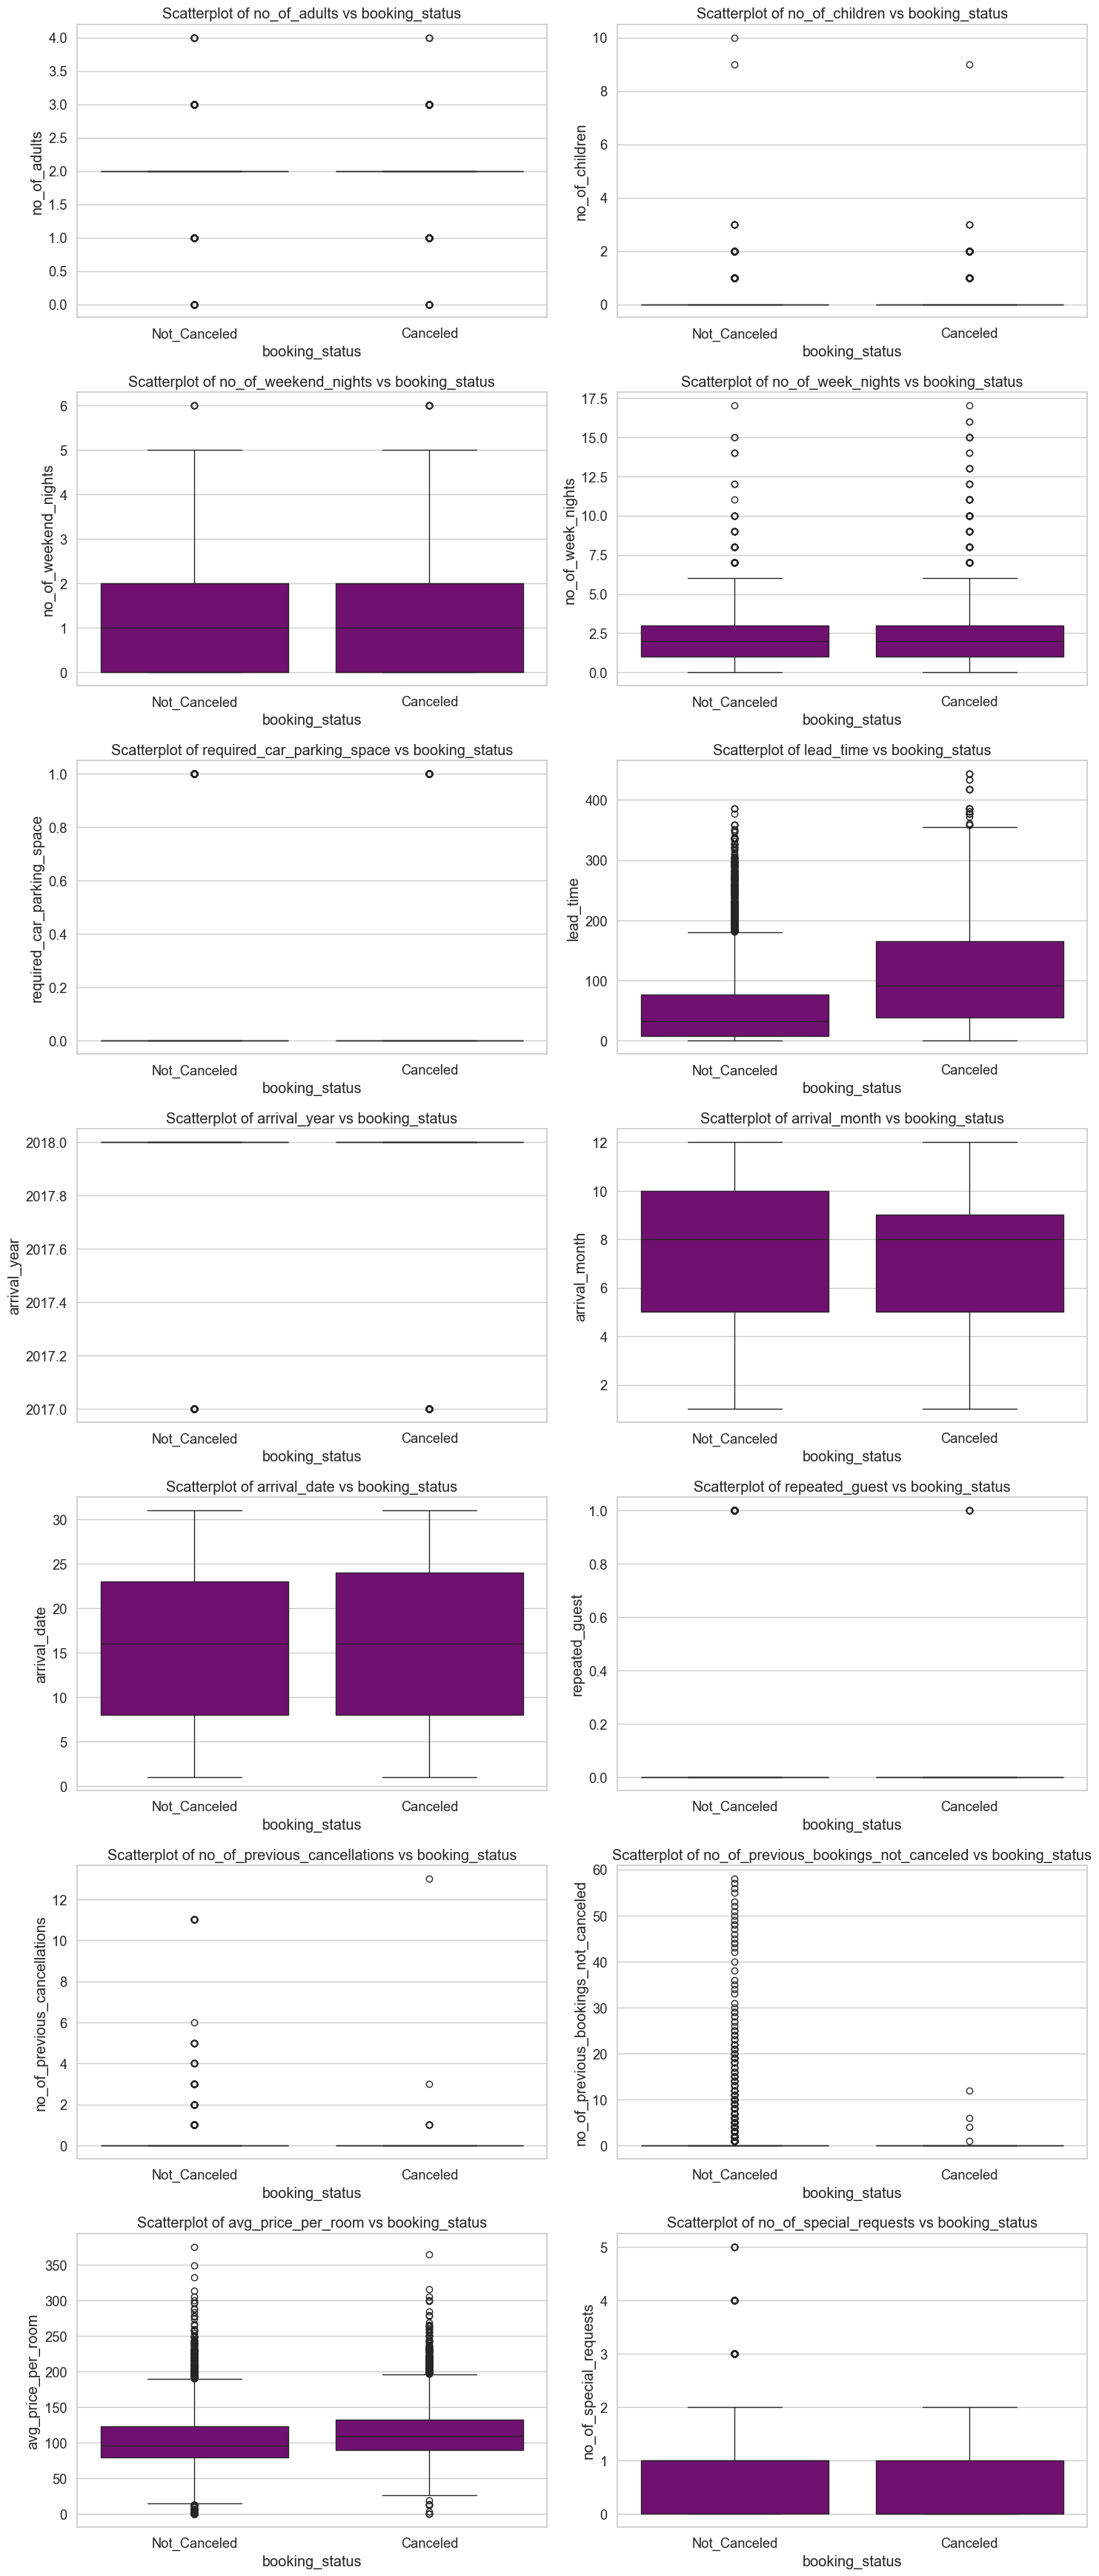

In [61]:
def plot_bivariate_num(df,target,num_cols):
    num_plots=len(num_cols)
    num_rows=(num_plots+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,5*num_rows))
    if num_rows==1:
        axes=[axes]
    axes=axes.flatten()


    for i,column in enumerate(num_cols):
        sns.boxplot(data=df,y=column,x=target,ax=axes[i],color='purple' )
        axes[i].set_title(f'Scatterplot of {column} vs {target}')
    plt.tight_layout()
    plt.show()   
plot_bivariate_num(df_train_copy,'booking_status',numerical_cols)

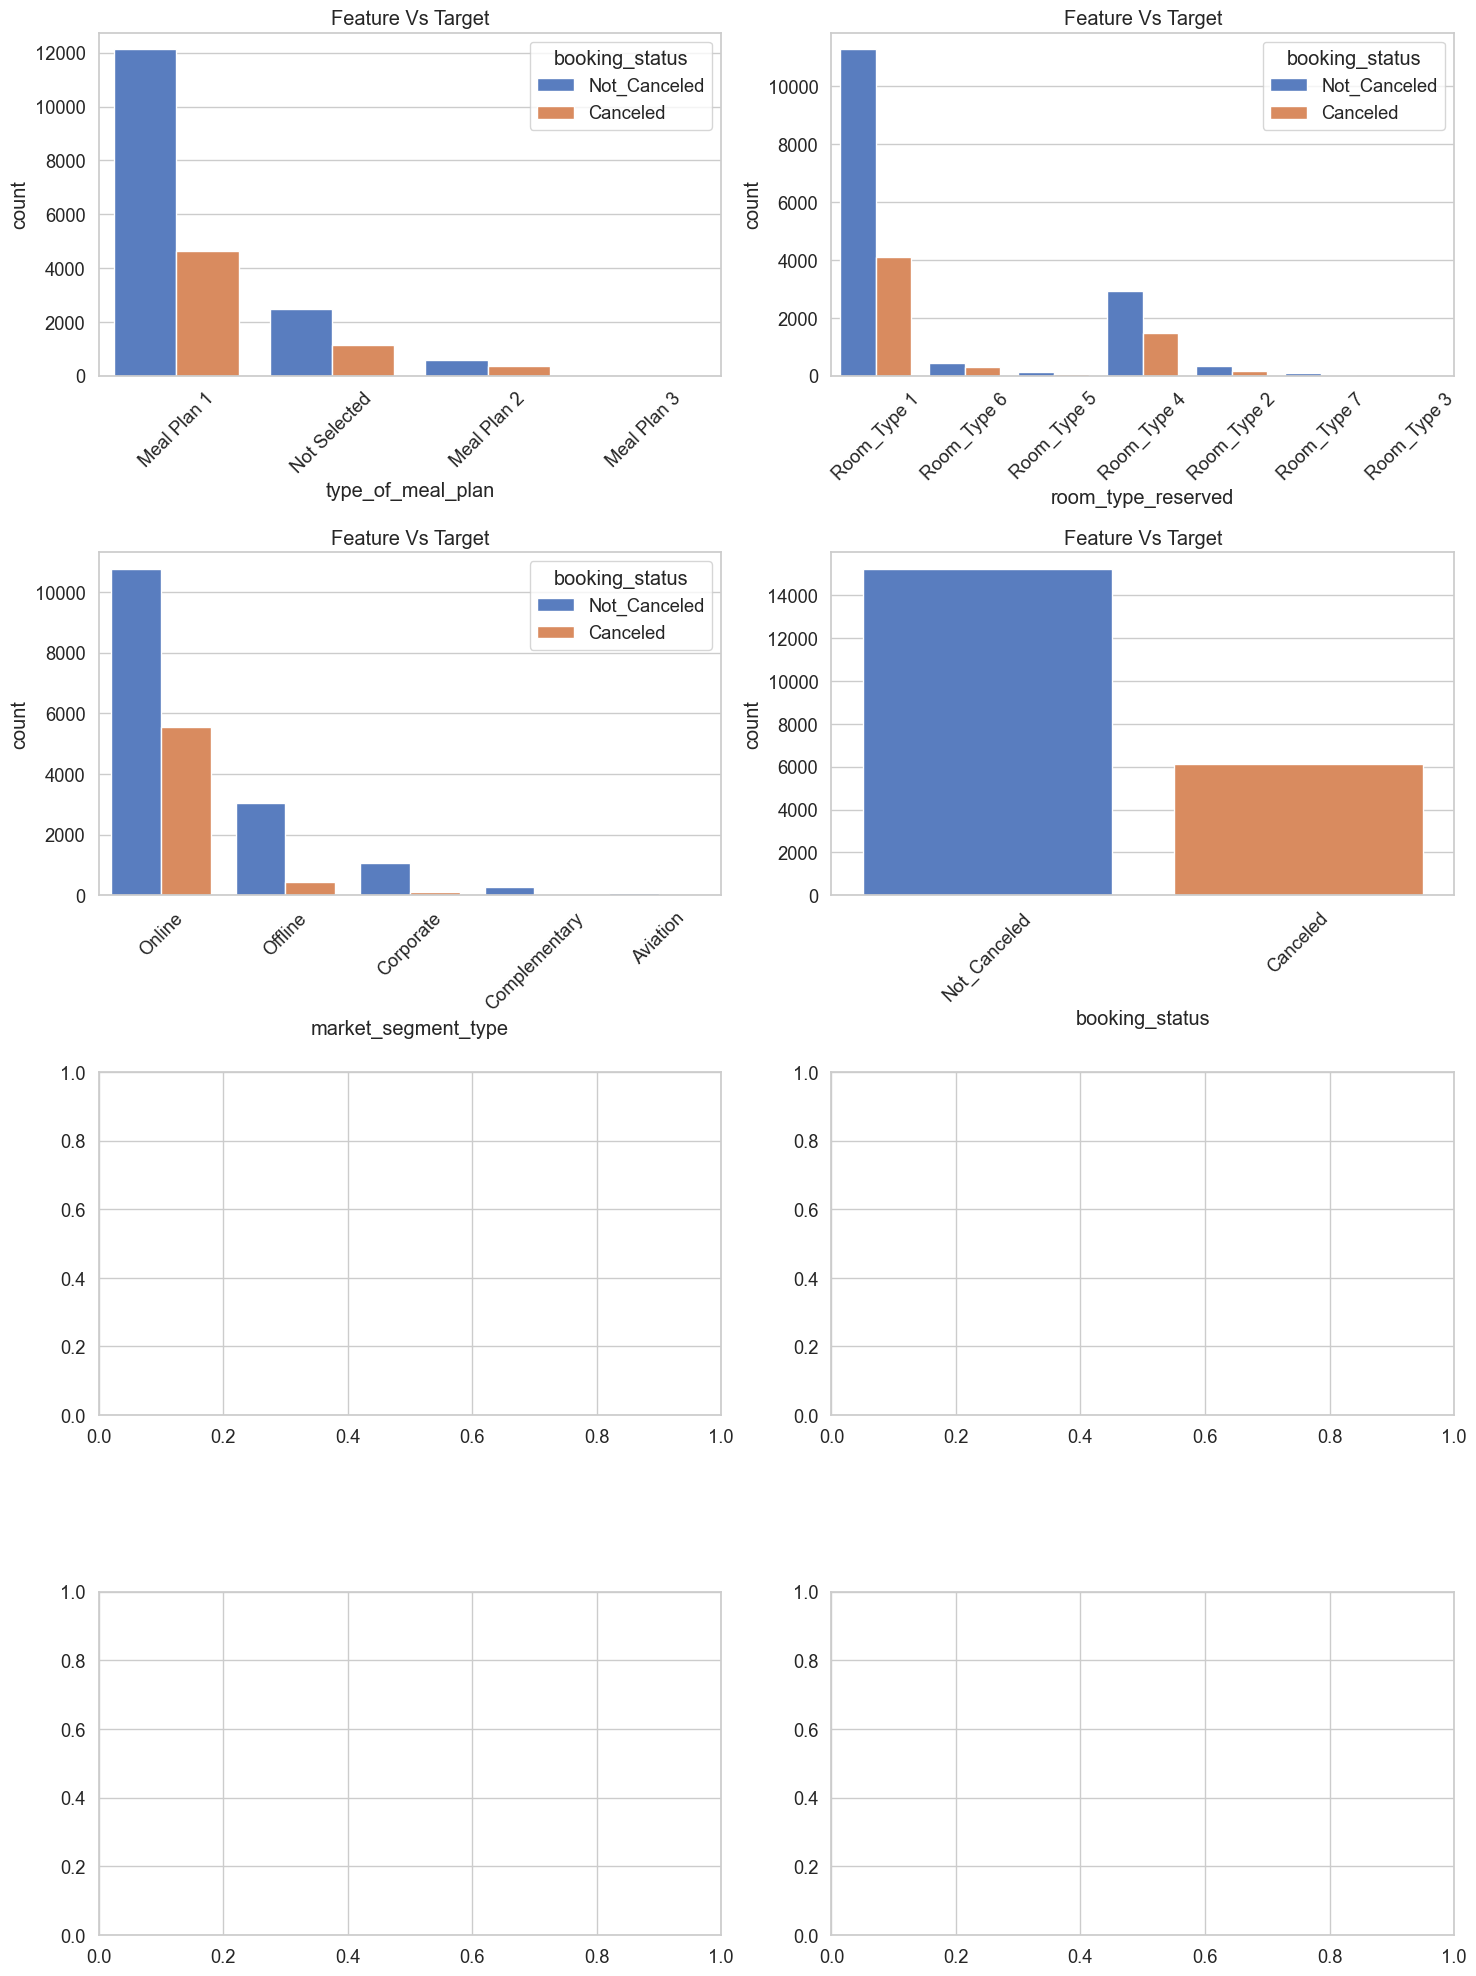

In [69]:
def plot_bivariate_cat(df,target,cat_columns):
    num_cat_features=len(cat_columns)
    num_of_rows=(num_cat_features+1//2)
    fig,axes=plt.subplots(num_cat_features,2,figsize=(15,5*num_of_rows))
    axes=axes.flatten()
    for i,col in enumerate(cat_columns):  
        sns.countplot(x=col,hue=target,data=df, ax=axes[i])
        axes[i].set_title("Feature Vs Target")
        axes[i].tick_params(axis='x',rotation=45)
    plt.tight_layout()
    plt.show()
plot_bivariate_cat(df_train_copy,"booking_status",cat_cols)    


In [74]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.7 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 9.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.9 MB/s  0:00:00
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   ------------ --------------------------- 11.0/36.4 MB 52.7 MB/s eta 0:00:01
   ------------------------ --------------- 22.3/36.4 MB 56.3 MB/s eta 0:00:01
   ------------------------------------ --- 33.0/36.4 MB 53.7 MB/s eta 0:00:01
   ---------------------------------------- 36.4/36.4 MB 47.2 MB/s  0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -------

In [75]:
####   Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    df_train[col+"_le"]=le.fit_transform(df_train[col])

In [76]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------------------ --------------- 5.8/9.6 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 33.2 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   

In [77]:
#Multicollearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x=add_constant(df_train[numerical_cols + [col+"_le" for col in cat_cols]])
vif_data=pd.DataFrame()
vif_data["Feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_data.sort_values(by="VIF",ascending=False)


,Feature,VIF
0,const,4.100197e+07
13,avg_price_per_room,1.926372e+00
10,repeated_guest,1.765576e+00
12,no_of_previous_bookings_not_canceled,1.712854e+00
17,market_segment_type_le,1.704297e+00
16,room_type_reserved_le,1.549859e+00
6,lead_time,1.406287e+00
11,no_of_previous_cancellations,1.396559e+00
18,booking_status_le,1.389308e+00
1,no_of_adults,1.341180e+00


In [90]:
numeric_var_with_cat_var=numerical_cols + [col+"_le" for col in cat_cols]

In [ ]:
df_trainnumeric_var_with_cat_var

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_le',
 'room_type_reserved_le',
 'market_segment_type_le',
 'booking_status_le']

<Axes: >

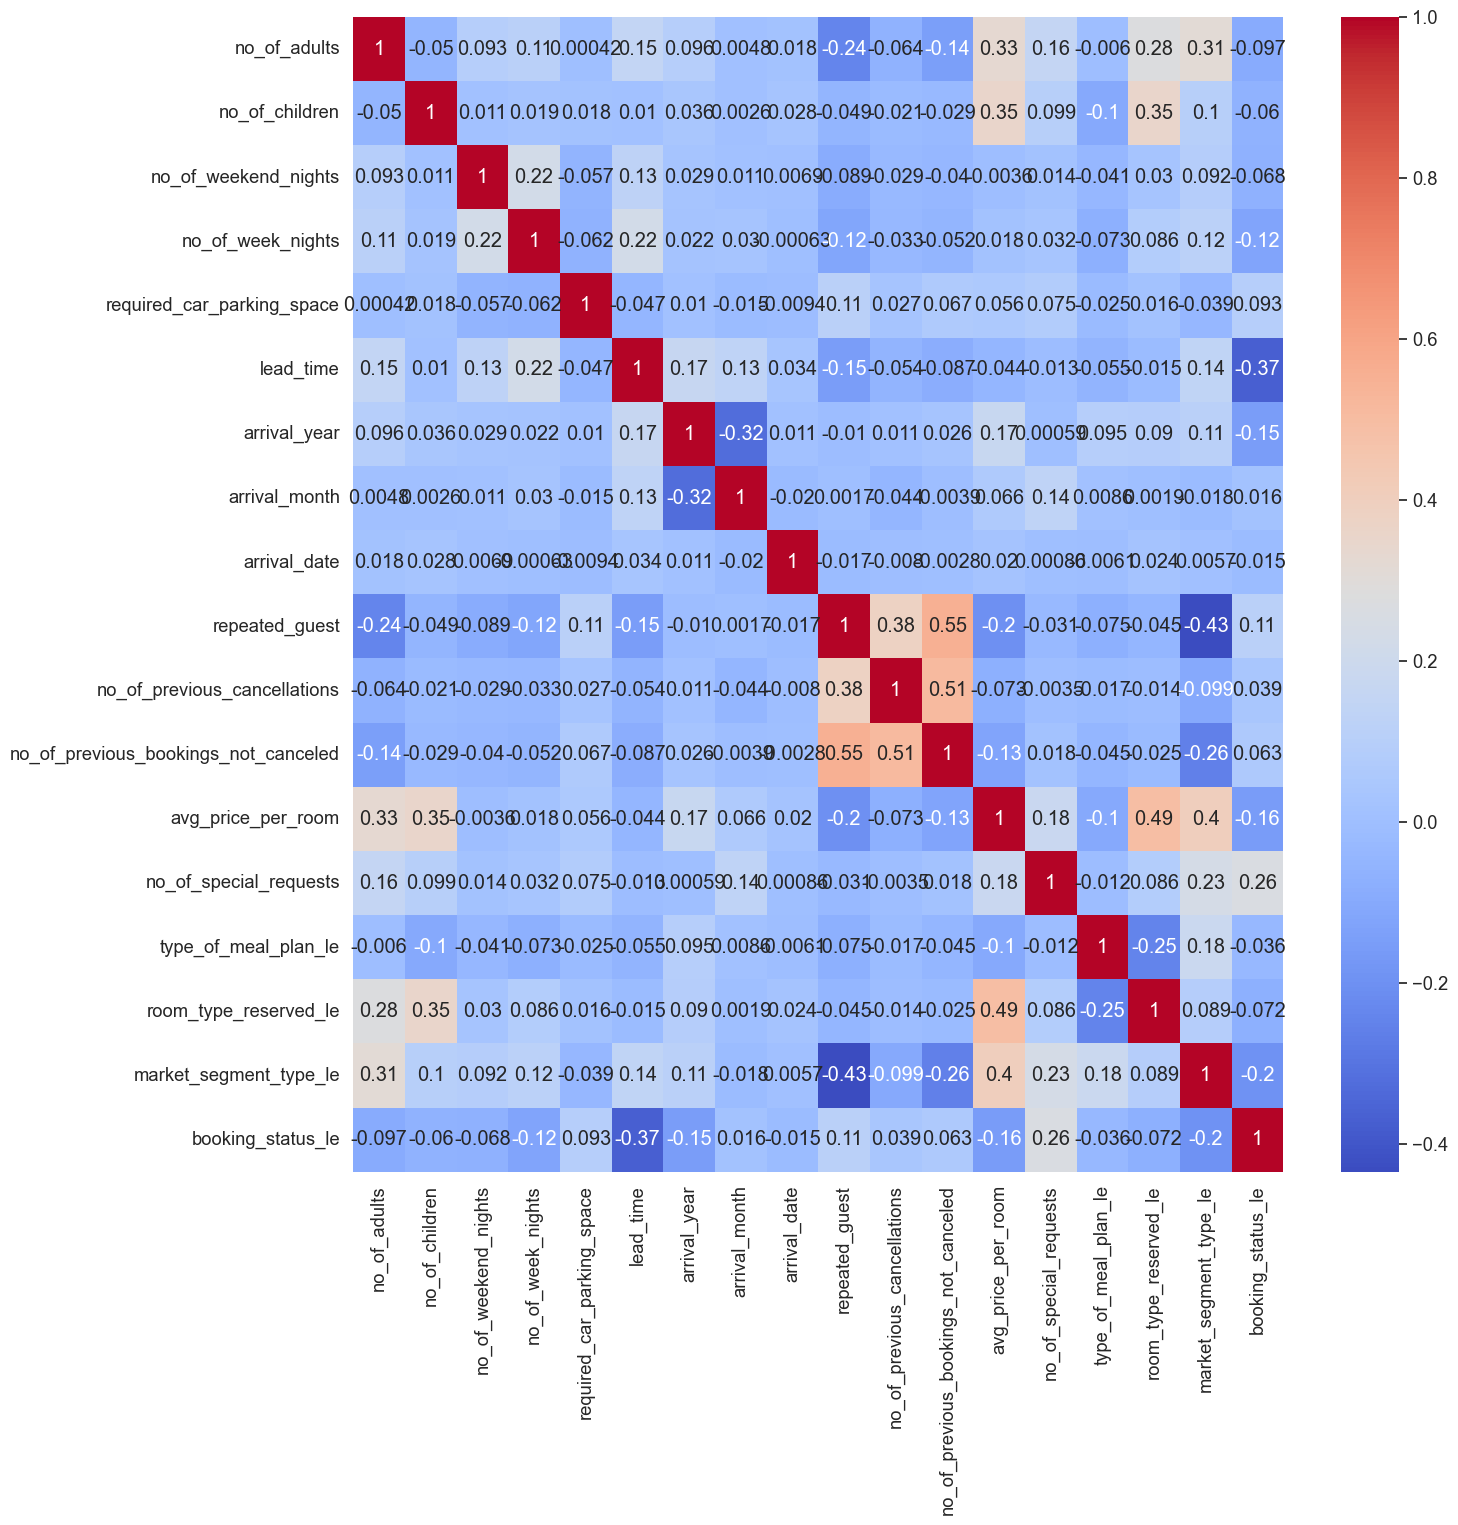

In [96]:
###############  Our data dont have any multi collinerity issues.
plt.figure(figsize=(15,15))
sns.heatmap(df_train[numeric_var_with_cat_var].corr(),annot=True,cmap='coolwarm')

In [112]:
df_train_new_copy=df_train.copy()

In [103]:
type(df_train_new_copy)

pandas.DataFrame

In [113]:
##########################  Swewness Check
skewness_before=df_train_new_copy[numeric_var_with_cat_var].skew()
display(skewness_before)
################### skewness handling can be done during feature engineering phase.
for col in df_train_new_copy[numeric_var_with_cat_var].columns:
    if skewness_before[col]>5:
        df_train_new_copy[col]=np.log1p(df_train_new_copy[col])
df_train_new_copy_after= df_train_new_copy[numeric_var_with_cat_var].skew()       
print(df_train_new_copy_after)

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
required_car_parking_space               4.538315
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
type_of_meal_plan_le                     1.650716
room_type_reserved_le                    1.392145
market_segment_type_le                  -2.333046
booking_status_le                       -0.942305
dtype: float64

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
required_car_parking_space               4.538315
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
type_of_meal_plan_le                     1.650716
room_type_reserved_le                    1.392145
market_segment_type_le                  -2.333046
booking_status_le                       -0.942305
dtype: float64


In [118]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -

In [120]:
df_train_new_copy.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_le', 'room_type_reserved_le',
       'market_segment_type_le', 'booking_status_le'],
      dtype='str')

In [121]:
##########################  inbalanced data check

df_train["booking_status"].value_counts(normalize=True)
X=df_train_new_copy[numeric_var_with_cat_var].drop("booking_status_le",axis=1)
y=df_train_new_copy["booking_status_le"]
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
print("Before SMOTE:",np.bincount(y))   
print("After SMOTE:",np.bincount(y_res))


Before SMOTE: [ 6128 15231]
After SMOTE: [15231 15231]


In [ ]:
############# balamced Data frame
balanced_df=pd.concat([pd.DataFrame(X_res,columns=X.columns),pd.DataFrame(y_res,columns=["booking_status_le"])],axis=1)
df=balanced_df.copy()
df.shape

In [141]:
#################### top top variables using RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_res,y_res)
rf.feature_importances_
df_importance=pd.DataFrame({"column":X.columns ,"importance":rf.feature_importances_})
df_importance=df_importance.sort_values(["importance"],ascending=False)
top_impartance_features=df_importance.head(10)      
top_impartance_features["column"].values.tolist()
df_top_10=df[top_impartance_features["column"].values.tolist()+["booking_status_le"]].copy()

In [137]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 8.5 MB/s eta 0:00:09
   ---- ----------------------------------- 7.6/72.0 MB 29.4 MB/s eta 0:00:03
   ------- -------------------------------- 13.6/72.0 MB 26.0 MB/s eta 0:00:03
   ------------ --------------------------- 22.3/72.0 MB 30.6 MB/s eta 0:00:02
   --------------- ------------------------ 28.6/72.0 MB 30.7 MB/s eta 0:00:02
   -------------------- ------------------- 36.4/72.0 MB 31.3 MB/s eta 0:00:02
   ------------------------ --------------- 44.8/72.0 MB 32.4 MB/s eta 0:00:01
   ------------------------------ --------- 54.5/72.0 MB 34.0 MB/s eta 0:00:01
   ------------------------------------ --- 66.6/72.0 MB 36.0 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 37.9 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 33.0 MB/s  0:00:02


In [138]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.5 MB/s  0:00:00


In [140]:
df_top_10

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type_le,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan_le,room_type_reserved_le
0,26,0,161.000000,10,17,4,1,2,0,0
1,98,2,121.500000,7,16,4,1,1,0,0
2,433,0,70.000000,9,8,3,3,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0
4,188,0,130.000000,6,15,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0
30458,103,0,72.250000,4,18,3,3,1,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0
30460,46,0,107.100000,4,4,4,1,1,3,0


In [149]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,roc_curve,precision_score,recall_score,f1_score

X=df_top_10.drop("booking_status_le",axis=1)
y=df_top_10["booking_status_le"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
models={
    "XGBClassifier":XGBClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
    "BaggingClassifier":BaggingClassifier(random_state=42),
    "ExtraTreesClassifier":ExtraTreesClassifier(random_state=42),
    "LogisticRegression":LogisticRegression(random_state=42),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "GaussianNB":GaussianNB(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "LGBMClassifier":LGBMClassifier(random_state=42)
}
matrics_df=pd.DataFrame(columns=["Model","Accuracy","Precision","Recall","F1-Score","ROC-AUC"])
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{"Model":model_name,
                                  "Accuracy":accuracy,
                                  "Precision":precision,
                                  "Recall":recall,
                                  "F1-Score":f1,
                                  "ROC-AUC":roc_auc}])], ignore_index=True) 

[LightGBM] [Info] Number of positive: 12185, number of negative: 12184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500021 -> initscore=0.000082
[LightGBM] [Info] Start training from score 0.000082


In [150]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,XGBClassifier,0.865091,0.862215,0.869009,0.865598,0.865092
1,RandomForestClassifier,0.888068,0.888305,0.887722,0.888013,0.888068
2,GradientBoostingClassifier,0.830625,0.815674,0.854235,0.834509,0.830629
3,AdaBoostClassifier,0.793862,0.796161,0.789888,0.793013,0.793861
4,BaggingClassifier,0.859183,0.884669,0.826001,0.854329,0.859177
5,ExtraTreesClassifier,0.8774,0.879749,0.874261,0.876997,0.8774
6,LogisticRegression,0.770556,0.794918,0.729153,0.760616,0.77055
7,SVC,0.723946,0.7315,0.707485,0.719292,0.723943
8,DecisionTreeClassifier,0.834892,0.845295,0.819764,0.832333,0.83489
9,GaussianNB,0.764812,0.789587,0.72193,0.754245,0.764805


In [155]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist={
    "n_estimators":randint(50,300),
    "max_depth":randint(3,10),
    "learning_rate":uniform(0.01,0.3),
    "subsample":uniform(0.5,1.0),
    "colsample_bytree":uniform(0.5,1.0)
}
RF=RandomForestClassifier(random_state=42)
param_dist={
    "n_estimators":randint(100,500),
    "max_depth":randint(3,20),
    "min_samples_split":randint(2,10),
    "min_samples_leaf":randint(1,10),
     "bootstrap":[True,False]
    }
random_search=RandomizedSearchCV(estimator=RF,
                                 param_distributions=param_dist,
                                 n_iter=50,scoring='accuracy',
                                 cv=5,verbose=2,
                                 random_state=42,
                                 n_jobs=-1)
random_search.fit(X_train,y_train)  

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....0022DFF77B450>, 'min_samples_leaf': <scipy.stats....0022DFF779B10>, 'min_samples_split': <scipy.stats....0022DFF77AE90>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the vari

In [156]:
best_params=random_search.best_params_
best_model=random_search.best_estimator_
y_pred=best_model.predict(X_test)   
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3047
           1       0.87      0.88      0.88      3046

    accuracy                           0.88      6093
   macro avg       0.88      0.88      0.88      6093
weighted avg       0.88      0.88      0.88      6093



In [159]:
# save the model
import joblib
joblib.dump(best_model, '../artifacts/models/random_forest.pkl')   


['../artifacts/models/random_forest.pkl']